<a href="https://colab.research.google.com/github/AddeshB/computer-vision-bootcamp/blob/master/CIFAR10CVbootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models
model = models.Sequential() 
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(64, (3, 3),  padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3),  padding='same', kernel_initializer='he_uniform', activation='relu')) 
model.add(layers.Conv2D(128, (3, 3),  padding='same', kernel_initializer='he_uniform', activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2)) 
model.add(layers.Flatten())
model.add(layers.Dense(128,  activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

created convolutional base following 2 blocks of Conv2D-MaxPooling2D with Dropout layers to reduce over-fitting

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam',
                      metrics=['acc'])


compiled model using categorical cross-entrophy as the loss function and the Adam optimizer

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(inpTrain, tarTrain), (inpTest, tarTest) = cifar10.load_data()
tarTrain = to_categorical(tarTrain)
tarTest = to_categorical(tarTest)


170500096/170498071 [==============================] - 6s 0us/step


downloaded dataset and prepared it for processing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
tempInpTrain = inpTrain.astype('float32')
tempInpTest= inpTest.astype('float32')

newInpTrain= tempInpTrain / 255.0
newInpTest = tempInpTest / 255.0
genData = ImageDataGenerator(rotation_range=40,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
iterTrain = genData.flow(newInpTrain, tarTrain, batch_size=64)





used data augmentation to further reduce overfitting by applying transformations to the images

In [8]:
history = model.fit_generator(iterTrain, steps_per_epoch=700, epochs=50, validation_data=(newInpTest, tarTest))




/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
700/700 [==============================] - 352s 503ms/step - loss: 1.6545 - acc: 0.3997 - val_loss: 1.3504 - val_acc: 0.5092
Epoch 2/50
700/700 [==============================] - 354s 505ms/step - loss: 1.3420 - acc: 0.5165 - val_loss: 1.1063 - val_acc: 0.6064
Epoch 3/50
700/700 [==============================] - 353s 504ms/step - loss: 1.1932 - acc: 0.5756 - val_loss: 1.1312 - val_acc: 0.6128
Epoch 4/50
700/700 [==============================] - 353s 505ms/step - loss: 1.1027 - acc: 0.6065 - val_loss: 1.0027 - val_acc: 0.6543
Epoch 5/50
700/700 [==============================] - 354s 506ms/step - loss: 1.0455 - acc: 0.6324 - val_loss: 0.9992 - val_acc: 0.6567
Epoch 6/50
700/700 [==============================] - 355s 508ms/step - loss: 0.9996 - acc: 0.6464 - val_loss: 0.8546 - val_acc: 0.7030
Epoch 7/50
700/700 [==============================] - 355s 508ms/step - loss: 0.9602 - acc: 0.6632 - val_loss: 0.9272 - val_acc: 0.6848
Epoch 8/50
700/700 [============================

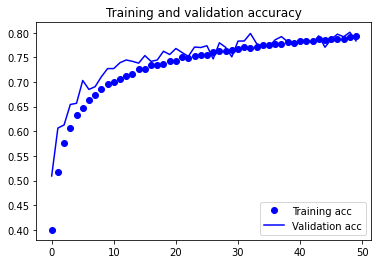

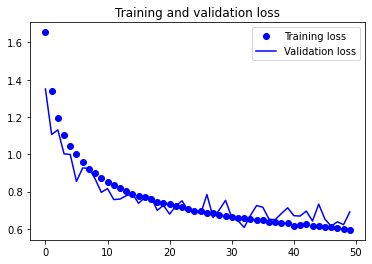

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(newInpTest,  tarTest)

313/313 [==============================] - 20s 63ms/step - loss: 0.6912 - acc: 0.7833


The model reached an accuracy of 78.33% with a loss of 0.6912. The graphs are also demonstrate that using both Dropout layers and data augmentation helped reduce the chances of the model overfitting. 

There is room for improvement to get higher accuracy values. This model was fairly simple with only 2 Conv2D blocks, but using more blocks would improve the overall model, though as the model becomes more complex training time takes longer. Alternatively fine-tuning a pretrained model such as InceptionV3 would see drastic improvements in performance.